In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



conn = sqlite3.connect("vendas.db")

In [9]:
query = """ 
    SELECT name
    FROM sqlite_master 
    WHERE type='table';
"""

pd.read_sql(query, conn)

,name
0,sqlite_sequence
1,vendas


In [10]:
consulta = """ 
    SELECT * FROM vendas
"""

vendas = pd.read_sql(consulta, conn)

In [11]:
vendas.head()

,id_venda,cliente,curso,valor,data_venda,forma_pagamento
0,1,Ana Silva,Excel,200.0,2025-01-05,Cartão
1,2,João Souza,Python,350.0,2025-01-06,Pix
2,3,Maria Lima,SQL,300.0,2025-01-07,Dinheiro
3,4,Carlos Nunes,Excel,200.0,2025-01-08,Pix
4,5,Paula Reis,Python,350.0,2025-01-09,Cartão


In [12]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venda         51 non-null     int64  
 1   cliente          51 non-null     object 
 2   curso            51 non-null     object 
 3   valor            51 non-null     float64
 4   data_venda       51 non-null     object 
 5   forma_pagamento  51 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB


In [13]:
vendas['data_venda'] = pd.to_datetime(vendas['data_venda'])

In [14]:
resumo_vendas = pd.pivot_table(
    vendas,
    values = 'valor',
    index = ['curso', 'forma_pagamento'],
    aggfunc = ['count', 'sum', 'mean']
)

resumo_vendas

count     sum   mean
                         valor   valor  valor
curso    forma_pagamento                     
Excel    Cartão              6  1200.0  200.0
         Dinheiro            4   800.0  200.0
         Pix                 5  1000.0  200.0
Power BI Cartão              3  1200.0  400.0
         Pix                 7  2800.0  400.0
Python   Cartão              6  2100.0  350.0
         Dinheiro            1   350.0  350.0
         Pix                 7  2450.0  350.0
SQL      Cartão              3   900.0  300.0
         Dinheiro            8  2400.0  300.0
         Pix                 1   300.0  300.0

In [15]:
curso_total = vendas.groupby('curso')['valor'].sum().reset_index(
    name='Valor_total').sort_values(by='Valor_total', ascending=False)
    
curso_total

,curso,Valor_total
2,Python,4900.0
1,Power BI,4000.0
3,SQL,3600.0
0,Excel,3000.0


In [16]:
pagamento_total = vendas.groupby('forma_pagamento')['valor'].sum().reset_index(
    name='Valor_total').sort_values(by='Valor_total', ascending=False)
pagamento_total

,forma_pagamento,Valor_total
2,Pix,6550.0
0,Cartão,5400.0
1,Dinheiro,3550.0


In [17]:
vendas.groupby([vendas['data_venda'].dt.month])['id_venda'].count().sort_values(ascending=False)

data_venda
2    28
1    20
3     2
4     1
Name: id_venda, dtype: int64

In [18]:
vendas.groupby([vendas['data_venda'].dt.month])['valor'].sum().sort_values(ascending=False)

data_venda
2    8400.0
1    6100.0
3     650.0
4     350.0
Name: valor, dtype: float64

In [19]:
vendas.groupby(['cliente'])['valor'].sum().sort_values(ascending=False)

cliente
Ricardo Alves      1650.0
João Souza         1600.0
Paula Reis         1600.0
Juliana Pires      1550.0
Lucas Rocha        1500.0
Ana Silva          1450.0
Carlos Nunes       1450.0
Fernanda Costa     1450.0
Marcos Vinícius    1450.0
Maria Lima         1450.0
Poliana Vasquez     350.0
Name: valor, dtype: float64

In [20]:
vendas.head()

,id_venda,cliente,curso,valor,data_venda,forma_pagamento
0,1,Ana Silva,Excel,200.0,2025-01-05,Cartão
1,2,João Souza,Python,350.0,2025-01-06,Pix
2,3,Maria Lima,SQL,300.0,2025-01-07,Dinheiro
3,4,Carlos Nunes,Excel,200.0,2025-01-08,Pix
4,5,Paula Reis,Python,350.0,2025-01-09,Cartão


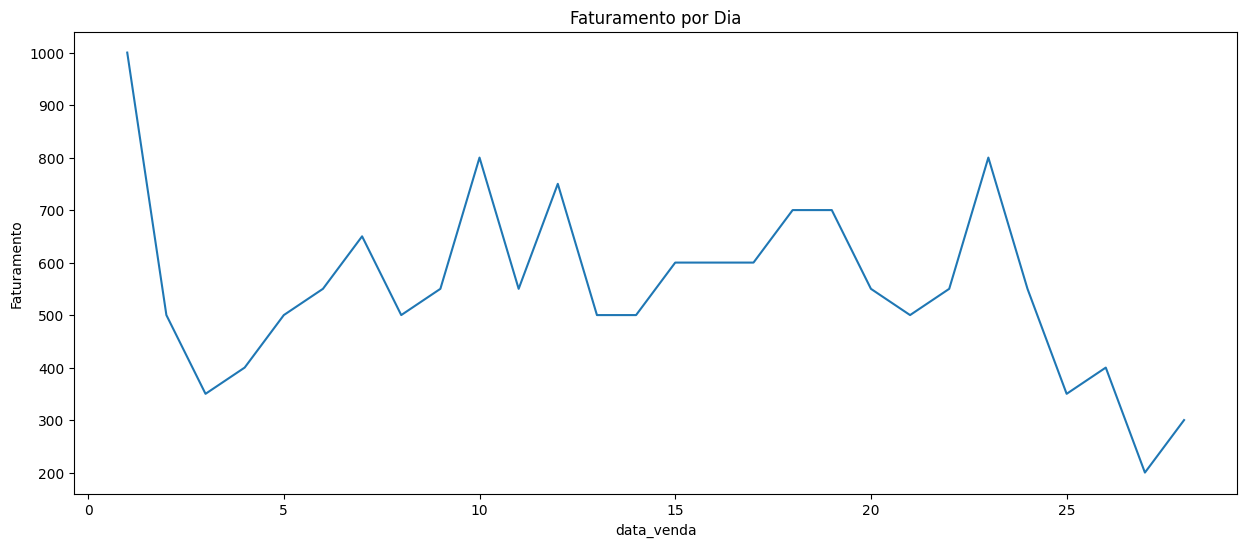

In [21]:
dia_vendas = vendas.groupby(vendas['data_venda'].dt.day)['valor'].sum().reset_index(
    name='Faturamento').sort_values(by='data_venda', ascending=True)

plt.figure(figsize=(15, 6))
sns.lineplot(data=dia_vendas, x='data_venda', y='Faturamento')
plt.title('Faturamento por Dia')
plt.show()

In [22]:
dia_vendas.head()

,data_venda,Faturamento
0,1,1000.0
1,2,500.0
2,3,350.0
3,4,400.0
4,5,500.0


Faturamento por dia da semana

O dia da semana mais recorrente dos clientes é no início da semana de preferência na terça - feira.

/tmp/ipykernel_431/1841019111.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dia_sem, x='dia_semana', y='Faturamento', palette='plasma')


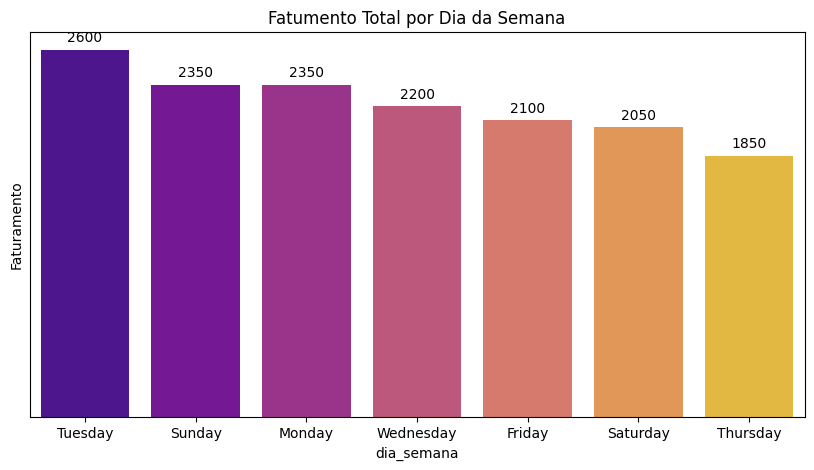

In [23]:
vendas['dia_semana'] = vendas['data_venda'].dt.day_name()

dia_sem = vendas.groupby('dia_semana')['valor'].sum().reset_index(
    name='Faturamento').sort_values(by='Faturamento', ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=dia_sem, x='dia_semana', y='Faturamento', palette='plasma')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title('Fatumento Total por Dia da Semana')
ax.set_yticks([]) 
plt.show()

In [24]:
# PREFERÊNCIA PARA O INÍCIO DA SEMANA
dia_sem

,dia_semana,Faturamento
5,Tuesday,2600.0
3,Sunday,2350.0
1,Monday,2350.0
6,Wednesday,2200.0
0,Friday,2100.0
2,Saturday,2050.0
4,Thursday,1850.0


In [25]:
dia_sem_qtd = vendas.groupby('dia_semana')['valor'].mean().reset_index(
    name='Média_valor').sort_values(by='Média_valor', ascending=False)

dia_sem_qtd

,dia_semana,Média_valor
1,Monday,335.714286
5,Tuesday,325.000000
6,Wednesday,314.285714
0,Friday,300.000000
3,Sunday,293.750000
2,Saturday,292.857143
4,Thursday,264.285714


ANÁLISE POR SEMANA

In [26]:
vendas['Semana'] = vendas['data_venda'].dt.isocalendar().week
vendas.head()

,id_venda,cliente,curso,valor,data_venda,forma_pagamento,dia_semana,Semana
0,1,Ana Silva,Excel,200.0,2025-01-05,Cartão,Sunday,1
1,2,João Souza,Python,350.0,2025-01-06,Pix,Monday,2
2,3,Maria Lima,SQL,300.0,2025-01-07,Dinheiro,Tuesday,2
3,4,Carlos Nunes,Excel,200.0,2025-01-08,Pix,Wednesday,2
4,5,Paula Reis,Python,350.0,2025-01-09,Cartão,Thursday,2


Mais da metade das vendas ocorreram em fevereiro, representando 54,19% do faturamento total.
Houve um queda significativa em março e abril, -92,26% 

/tmp/ipykernel_431/1463092235.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=faturamento_mes, x='Mês', y='Faturamento', palette='plasma')


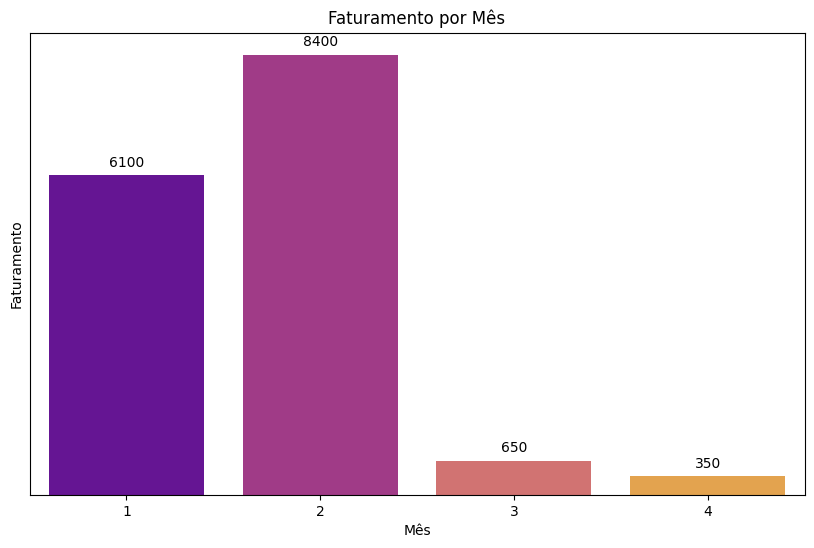

In [27]:
#faturamento por mês
vendas['Mês'] = vendas['data_venda'].dt.month

faturamento_mes = vendas.groupby('Mês')['valor'].sum().reset_index(name='Faturamento')


plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=faturamento_mes, x='Mês', y='Faturamento', palette='plasma')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
plt.title('Faturamento por Mês')
barplot.set_yticks([]) 
plt.show()


In [28]:
faturamento_mes['Comparação'] = faturamento_mes['Faturamento'].shift(1)
faturamento_mes['Comparação_pct %'] = ((faturamento_mes['Faturamento'] - faturamento_mes[
    'Comparação']) * 100 / faturamento_mes['Comparação']).round(2)

faturamento_mes['Porcentagem (%)'] = (faturamento_mes['Faturamento'] * 100 / vendas['valor'].sum()).round(2)

faturamento_mes

,Mês,Faturamento,Comparação,Comparação_pct %,Porcentagem (%)
0,1,6100.0,NaN,NaN,39.35
1,2,8400.0,6100.0,37.70,54.19
2,3,650.0,8400.0,-92.26,4.19
3,4,350.0,650.0,-46.15,2.26


O pix foi o pagamento preferido dos clientes com R$ 6550, por outro lado o dinheiro físico foi menos usado R$ 3550.

/tmp/ipykernel_431/843842175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=pagamento, y='Quantidade', x='forma_pagamento', palette='plasma')


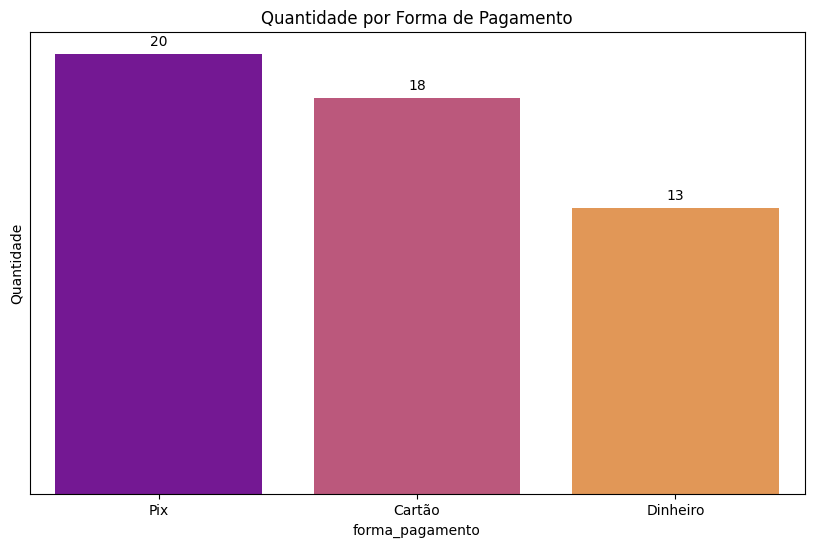

In [29]:
pagamento = vendas.groupby('forma_pagamento')['id_venda'].count().reset_index(
    name='Quantidade').sort_values(by='Quantidade', ascending=False)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=pagamento, y='Quantidade', x='forma_pagamento', palette='plasma')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title('Quantidade por Forma de Pagamento')
barplot.set_yticks([])
plt.show()

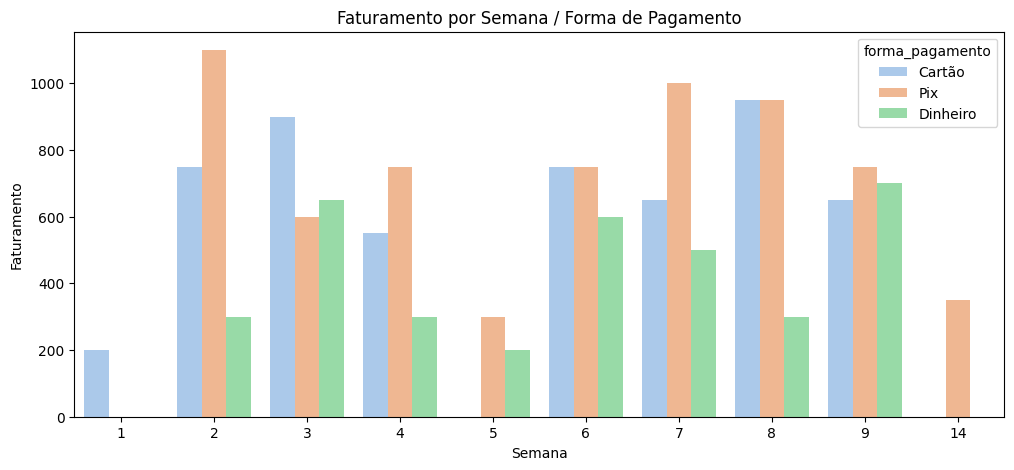

In [30]:
m_semana_qtd = vendas.groupby(['Semana', 'forma_pagamento'])['valor'].sum().reset_index(
    name='Faturamento').sort_values(by='Faturamento', ascending=False)


plt.figure(figsize=(12, 5))
sns.barplot(data=m_semana_qtd, x='Semana', y='Faturamento', hue='forma_pagamento', palette='pastel')
plt.title('Faturamento por Semana / Forma de Pagamento')
plt.show()

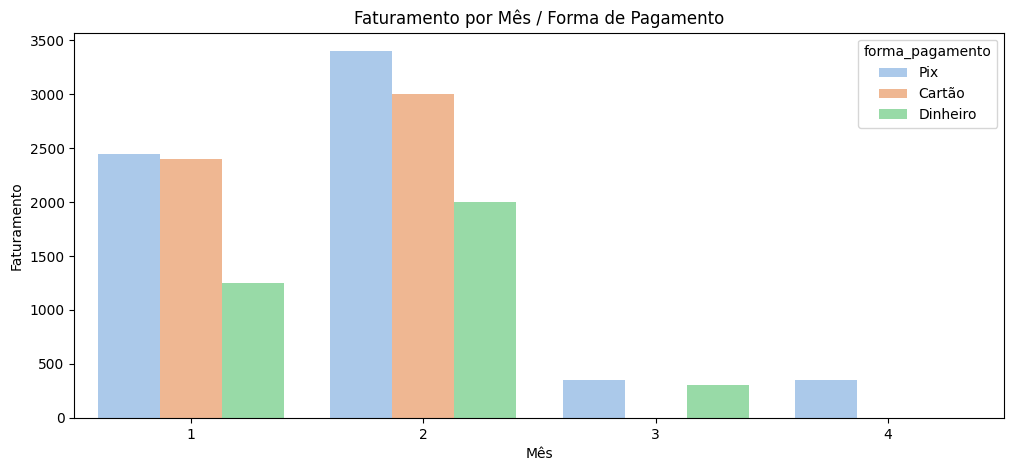

In [31]:
m_mes_qtd = vendas.groupby(['Mês', 'forma_pagamento'])['valor'].sum().reset_index(
    name='Faturamento').sort_values(by='Faturamento', ascending=False)


plt.figure(figsize=(12, 5))
sns.barplot(data=m_mes_qtd, x='Mês', y='Faturamento', hue='forma_pagamento', palette='pastel')

plt.title('Faturamento por Mês / Forma de Pagamento')
plt.show()

ANÁLISE POR CURSO
________________

Python foi o curso com maior lucro: R$ 4900, 
Excel o mais procurado com 15 vendas, PowerBI apareceu com a melhor média.

/tmp/ipykernel_431/3865547908.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=f_curso, x='Faturamento', y='curso', palette='plasma')


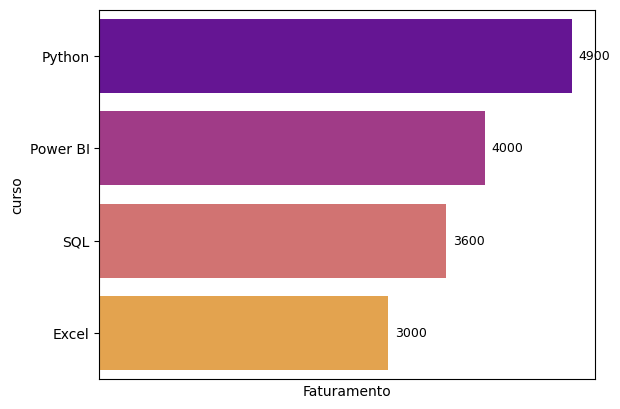

In [32]:
f_curso = vendas.groupby('curso')['valor'].sum().reset_index(
    name='Faturamento').sort_values(by='Faturamento', ascending=False)

ax = sns.barplot(data=f_curso, x='Faturamento', y='curso', palette='plasma')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black', xytext=(5, 0), textcoords='offset points')
ax.set_xticks([]) 
plt.show()

Melhor Cliente: Ricardo Alves

/tmp/ipykernel_431/1725581195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=f_cliente, x='Faturamento', y='cliente', palette='plasma')


Text(0.5, 1.0, 'Faturamento por Cliente')

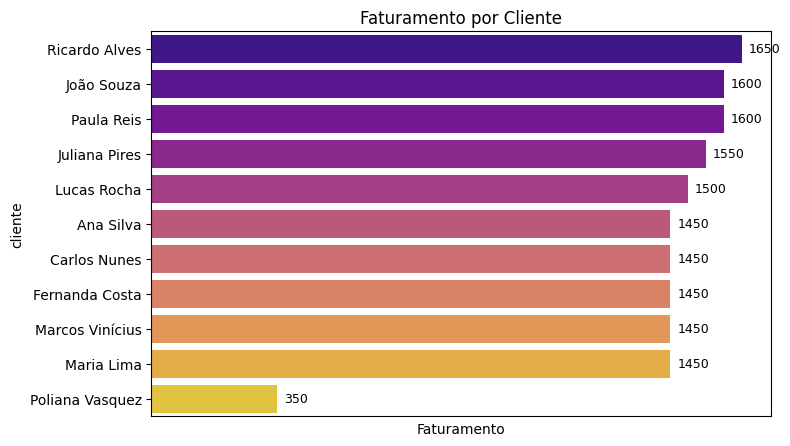

In [33]:
f_cliente = vendas.groupby('cliente')['valor'].sum().reset_index(
    name='Faturamento').sort_values(by='Faturamento', ascending=False)


plt.figure(figsize=(8, 5))
ax = sns.barplot(data=f_cliente, x='Faturamento', y='cliente', palette='plasma')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black', xytext=(5, 0), textcoords='offset points')

ax.set_xticks([])
plt.title('Faturamento por Cliente')


In [34]:
# Resumo
print('Faturamento Total R$', vendas['valor'].sum())
print('Cursos: ', vendas['curso'].nunique())
print('Cliente: ', vendas['cliente'].nunique())
print('Formas de Pagamento:', vendas['forma_pagamento'].nunique())
print('Dias de Venda: ', vendas['data_venda'].dt.day.nunique())

Faturamento Total R$ 15500.0
Cursos:  4
Cliente:  11
Formas de Pagamento: 3
Dias de Venda:  28


CONCLUSÃO FINAL: Houve grande atividade no início do ano (janeiro e Fevereiro), porém as vendas cairam significadamente nos dois últimos meses analisados, o que leva a desconfiar que ocorreu uma campanha de marketing, divulgação em larga escala e as vagas acabaram. Os conteúdos são voltados para tecnologia e ferramentos em dados e apresentam um equilibrio nas vendas, os clientes preferem pagamentos mais simplificados e práticos como pix e cartão invés de meios tradicionais como dinheiro.

In [35]:
# Conversão para csv
vendas2 = vendas.copy()

vendas2.to_csv('vendas.csv', index=False, encoding='utf-8')  # index=False para não salvar o índice
